# Walking with Data (About Dinosaurs)

*Data sourced from [The Exhaustive Dinosaur Dataset](https://www.kaggle.com/datasets/kjanjua/jurassic-park-the-exhaustive-dinosaur-dataset).*
*Information dates to 2021 and as such may not be fully up to date; The field is moving very fast!*

In [1]:
# Dependencies
import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv, DataFrame
from data_processors import with_lengths, with_epochs
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# First, we obtain and display our base dataset. 
# Here it's possible to notice a missing value for length; such null values can be handled as needed!
DINO_DATA: DataFrame = read_csv("./dinosaur_data.csv")
DINO_DATA = with_lengths(
    with_epochs(
        DINO_DATA
    )
)
DINO_DATA[::60]

,name,diet,lived_in,type,taxonomy,named_by,species,link,epoch,mya_lower,mya_upper,length_m
0,aardonyx,herbivorous,South Africa,sauropod,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,Early Jurassic,199,189,8.0
60,cetiosaurus,herbivorous,United Kingdom,sauropod,Dinosauria Saurischia Sauropodomorpha Sauropod...,Phillips (1871),oxoniensis,https://www.nhm.ac.uk/discover/dino-directory/...,Mid Jurassic,170,160,18.0
120,graciliceratops,herbivorous,Mongolia,ceratopsian,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sereno (2000),mongoliensis,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,99,84,0.0
180,minmi,herbivorous,Australia,armoured dinosaur,Dinosauria Ornithischia Genasauria Thyreophora...,Molnar (1980),paravertebra,https://www.nhm.ac.uk/discover/dino-directory/...,Early Cretaceous,121,112,3.0
240,saltasaurus,herbivorous,Argentina,sauropod,Dinosauria Saurischia Sauropodomorpha Sauropod...,Bonaparte and Powell (1980),loricatus,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,70,65,12.0
300,yangchuanosaurus,carnivorous,China,large theropod,Dinosauria Saurischia Theropoda Neotheropoda T...,Dong Chang Li and Zhou (1978),shangyouensis,https://www.nhm.ac.uk/discover/dino-directory/...,Late Jurassic,160,144,10.0


## The Mesozoic didn't start as the Age of Dinosaurs

Top predator roles right up to the end-Triassic extinction event were in fact dominated by Rauisuchia, a group of Pseudosuchians (more closely related to modern Crocodiles and Alligators than to Dinosaurs).
It was in the wake of this catastrophe that dinosaurs were able to truly expand into these and many other niches.

This can be reflected in the mean body lengths of dinosaurs and the standard deviation of sizes over the stages of each geological period; we see a rise in mean and standard deviation throughout the Jurassic period, with maximum sizes peaking during the Cretaceous.


<Axes: xlabel='epoch', ylabel='length_m'>

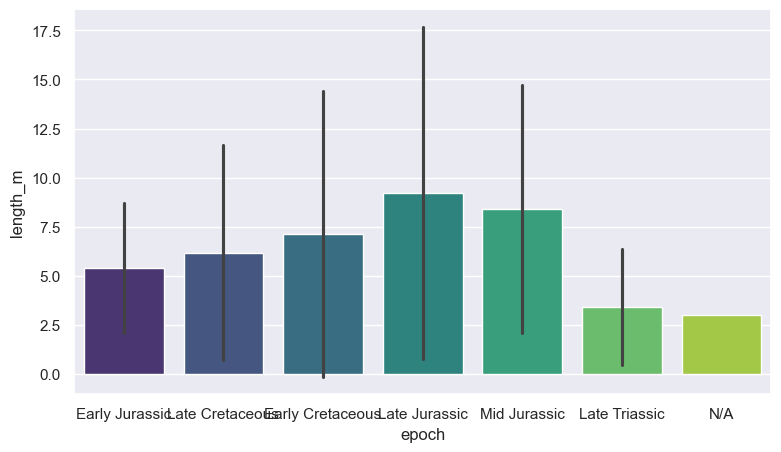

In [3]:

epoch_metrics: DataFrame = DataFrame(
    columns=['epoch', 'mean', 'SD']
)
epochs = [
    'Late Triassic', 
    'Early Jurassic', 'Mid Jurassic', 'Late Jurassic', 
    'Early Cretaceous', 'Late Cretaceous'
]

epoch_metrics['mean'] = [
    DINO_DATA[(DINO_DATA['epoch'] == epoch) & (DINO_DATA['length_m'] > 0)]['length_m'].mean()
    for epoch in epochs
]
epoch_metrics['SD'] = [
    DINO_DATA[(DINO_DATA['epoch'] == epoch) & (DINO_DATA['length_m'] > 0)]['length_m'].std()
    for epoch in epochs
]

sns.set(rc={'figure.figsize':(9, 5)})
sns.barplot(
    DINO_DATA, 
    x='epoch', 
    y='length_m', 
    ci="sd", 
    palette='viridis'
)